## Pregunta 1

Consideremos la función

$$f(x)=x-3\arctan(x)+1$$

1. Demostrar que, en el intervalo $[2,+\infty]$, existe una única solución, $\alpha_1$, de $f(x)=0$. Representar la gráfica de $f$ y conjeturar, gráficamente, la existencia de otras dos raíces $\alpha_2\in [0,1]$ y $\alpha_3\in[-6,-4]$.

2. Programar una función que realice un número dado de iteraciones del método de Newton y devuelva una lista, llamada `lista_x` , formada por todas las iteraciones, $x_k$, realizadas
3. Partiendo de $x_0=2$, calcular el número de iteraciones necesarias para aproximar $\alpha_1$ mediante el método de Newton con un error menor que $\varepsilon=10^{-15}$. Para ello, utilizar la función programada en el apartado anterior. Mostrar una tabla con todas las iteraciones realizadas (por ejemplo, se puede usar la función `print` o, mejor el paquete *pandas*, véase el Problema-0 del Tema1).

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/cucharro/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


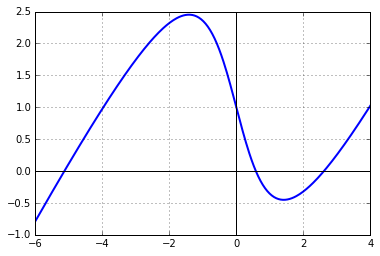

In [5]:
f = lambda x: x-3*np.arctan(x)+1
x = linspace(-6,4,num=300)
plot(x,f(x), lw=2)
axhline(c='k'); axvline(c='k')
grid()

## Apartado 1

Dada $f(x)=x-3\arctan(x)+1$, veamos que hay un único cero en $[2,+\infty$):

1. Hay un cambio de signo en $[2,4]$: $f(2)\cdot f(4)<0$
2. Veamos que $f'(x)>0$ si $x\ge 2$:
    $$
    f'(x)=1-\frac{3}{1+x^2}
    $$
    Si $x\ge 2$, entonces $1+x^2\ge 1+2^2=5>3$, por tanto $\frac{3}{1+x^2}<1$ y así $f'(x)>0$. 
    
Además, a la vista de la gráfica, podemos conjeturar que existen otros dos ceros en $[-6,4]$ y en $[0,1]$.

## Apartado 2

In [6]:
def newton(f, df, x0, tol=1e-15, maxiter=100):
    """Cálculo de una solución de $f(x)=0$ mediante el método de Newton.
    
    Argumentos:
        f: Función considerada
        df: Función derivada de f
        x0 : Estimación inicial
        tol: Tolerancia (diferencia entre dos iteraciones sucesivas)
        maxiter: Número máximo de iteraciones admitidas
    Valores devueltos: (x, niter) con
        x: Aproximación del punto fijo
        niter: Número de iteraciones realizadas
    """
    k = 0
    diferencia = tol
    lista_x = [x0]
    while k<maxiter and diferencia >= tol:    
        x1 = x0-f(x0)/df(x0) # Iteración de Newton
        lista_x.append(x1)
        diferencia = abs(x1-x0) # Preparamos la siguiente iteración
        x0 = x1 
        k = k+1
        
    # Si se llegó al número máximo de iteraciones, lanzar una excepción (un "error")
    if k==maxiter: 
        raise ValueError("Error de convergencia!") 
        
    # Si todo fue bien, devolvemos la solución y el número de iteraciones
    return lista_x

In [7]:
df = lambda x: 1-3/(1+x**2)
df(0)
lista_x = newton(f,df,x0=2)
print("Lista de aproximaciones:", lista_x)
print("Número de iteraciones: %d " % len(lista_x))
print("Última aproximación: %1.6f" % lista_x[-1])

Lista de aproximaciones: [2, 2.8036153834556781, 2.6235866782722992, 2.6176585217579817, 2.6176513053514689, 2.6176513053407358, 2.6176513053407358]
Número de iteraciones: 7 
Última aproximación: 2.617651


## Apartado 3

Según la estimación a posteriori en el método de Newton:
$$
|x_{k+1}-\alpha_1| < \frac{M_2}{2m_1} |x_{k+1}-x_k|,
$$
donde
$$
M_2=\max_{x\in[a,b]} \left|f''(x)\right|, \quad m_1=\min_{x\in[a,b]} \left|f'(x)\right|.
$$

Así, para que $|x_{k+1}-\alpha_1|<\varepsilon$, basta calcular $k\in\mathbb{N}$ tal que
$$
    \frac{M_2}{2m_1}  |x_{k+1}-x_k|\le \varepsilon \quad\mbox{es decir}\quad |x_{k+1}-x_k| \le \frac{2m_1}{M_2}\varepsilon.
$$


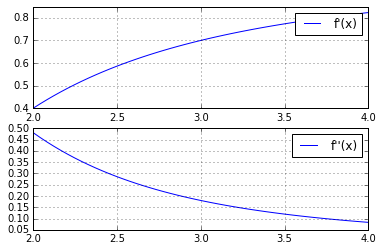

In [8]:
a,b=2,4
x=linspace(2,4)

subplot(2,1,1)
plot(x,df(x),label="f'(x)")
legend()
grid()

subplot(2,1,2)
d2f = lambda x: 6*x/(1+x**2)**2
plot(x,d2f(x), label="f''(x)")
legend()
grid()

In [9]:
m1=df(a)
M2=d2f(a)
print("m_1=%f, M_2=%f" % (m1, M2))

m_1=0.400000, M_2=0.480000
